**Введение** **в** **молекулярную** **биологию** **и** **генетику**

**Задание** **6**.

Скачайте данные SRR12905311 из SRA NCBI. Опишите, что за исследование проводилось, на каком организме. Можно воспользоваться GEO (GSM4862160).

Препроцессируйте риды (оценка качества, триммирование по необходимости, выравнивание на референс) и проведите поиск SNP.

Выберите 3-4 выявленные мутации. Проверьте по NCBI, каким генам они принадлежат, и предположите, как эти мутации могут влиять на жизнедеятельность организма.

Не забывайте, что ваши мутации не относятся к человеку.

**Исследование** **SRR12905311** проводилось на Pseudomonas aeruginosa (Синегнойная палочка).

Синегнойная палочка — вид грамотрицательных аэробных подвижных палочковидных бактерий. Обитает в воде, почве, условно патогенна для человека, возбудитель внутрибольничных инфекций у человека. Лечение затруднительно ввиду высокой устойчивости к антибиотикам.

**Целью** **этого** **эксперимента** было определить, может ли развитие устойчивости к антибиотикам быть обусловлено концентрацией и видообразованием Cu.

Экспериментальная установка была разработана для изучения двух гипотез, для которых были выбраны два штамма грамотрицательных бактерий.

Был проведен гидропонный эксперимент с экспозицией 72 часа. Питательная среда была выбрана таким образом, чтобы обеспечить оптимальную концентрацию свободного Cu2+ в растворе за счет ограничения комплексообразования Cu2+ с компонентами среды. В эту среду добавляли три концентрации Cu: Cu=0 (контроль), Cu=MIC/10 и Cu=MIC (MIC = минимальная ингибирующая концентрация). Образцы (бактерии + раствор) отбирали через 0, 24, 48 и 72 часа.

https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR12905311&display=metadata

https://www.ncbi.nlm.nih.gov/datasets/taxonomy/287/

##**Препроцессинг** **ридов**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reads = '/content/drive/MyDrive/BIO/SRR12905311.fastq'
ref = '/content/drive/MyDrive/BIO/GCF_000006765.1_ASM676v1_genomic.fna'
ann = '/content/drive/MyDrive/BIO/genomic1.gtf'

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [ ]:
!conda install -c bioconda fastqc bwa samtools bcftools star

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bcftools
    - bwa
    - fastqc
    - samtools
    - star


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.10            |       hd590300_0         542 KB  conda-forge
    bcftools-1.19              |       h8b25389_0         948 KB  bioconda
    bwa-0.7.17                 |      he4a0461_11         192 KB  bioconda
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    expat-2.5.0                |       hcb278e6_1         134 KB  conda-forge
    fastqc-0.12.1              |       hdfd78af_0        11.1 MB  bioc

### **QC** (**quality** **control**)

In [ ]:
!fastqc $reads # .html, .zip

null
Started analysis of SRR12905311.fastq
Approx 5% complete for SRR12905311.fastq
Approx 10% complete for SRR12905311.fastq
Approx 15% complete for SRR12905311.fastq
Approx 20% complete for SRR12905311.fastq
Approx 25% complete for SRR12905311.fastq
Approx 30% complete for SRR12905311.fastq
Approx 35% complete for SRR12905311.fastq
Approx 40% complete for SRR12905311.fastq
Approx 45% complete for SRR12905311.fastq
Approx 50% complete for SRR12905311.fastq
Approx 55% complete for SRR12905311.fastq
Approx 60% complete for SRR12905311.fastq
Approx 65% complete for SRR12905311.fastq
Approx 70% complete for SRR12905311.fastq
Approx 75% complete for SRR12905311.fastq
Approx 80% complete for SRR12905311.fastq
Approx 85% complete for SRR12905311.fastq
Approx 90% complete for SRR12905311.fastq
Approx 95% complete for SRR12905311.fastq
Analysis complete for SRR12905311.fastq


**Содежание** **отчета** **FastQC** **Report**

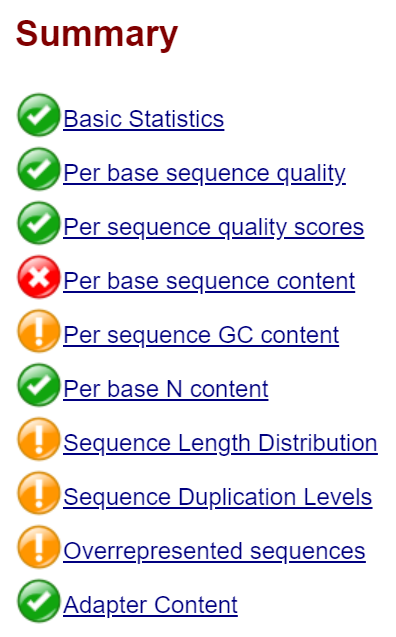

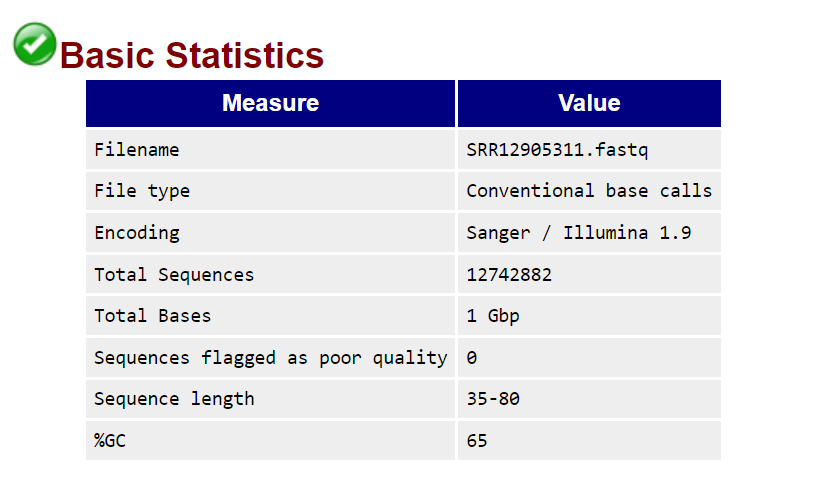

Длина ридов от 35 до 80 нуклеотидов.

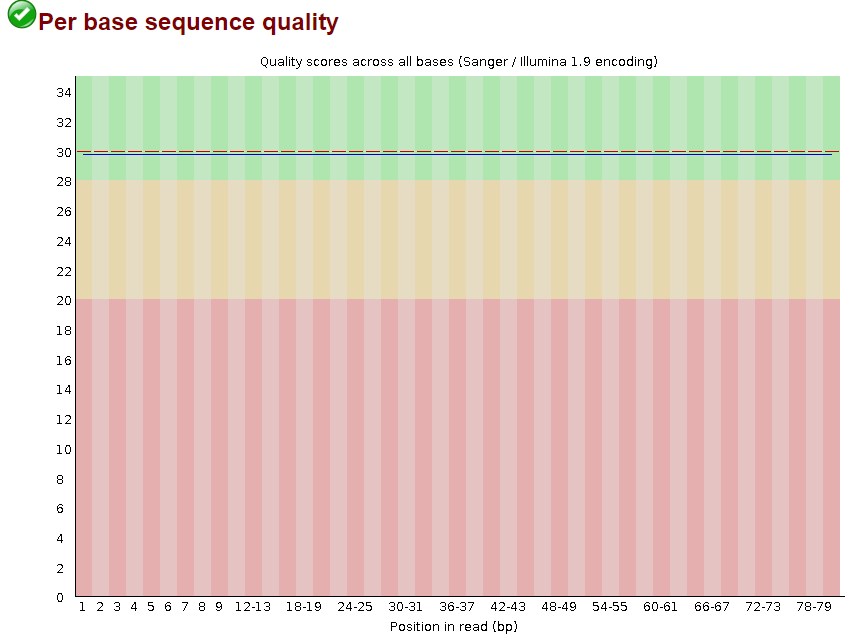

Для всех ридов качество секвенирования находится в зеленой зоне.

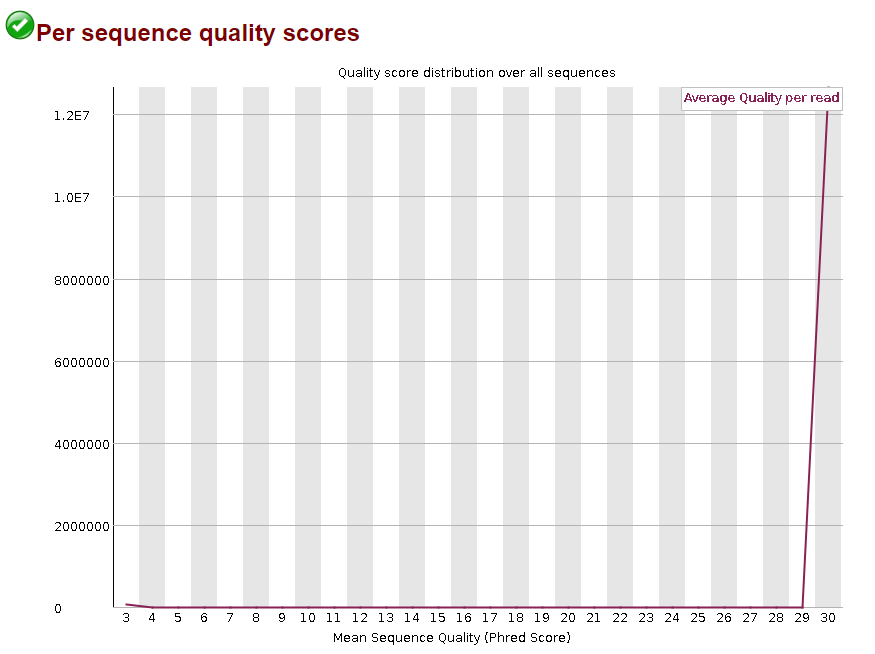

Пик один. Качество высокое.

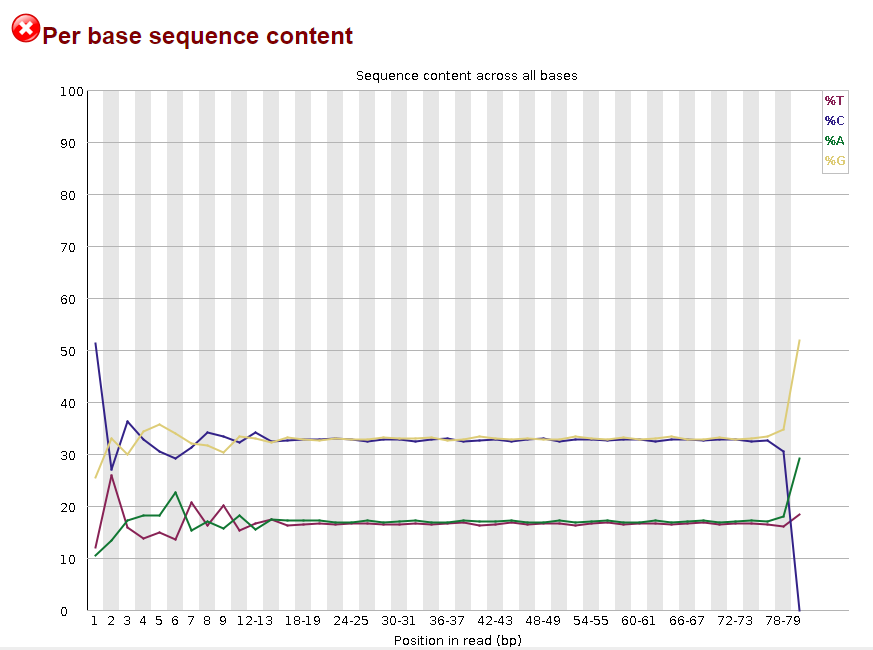

Распределение по количеству нуклеотидов неравномерное. Возможно загрязнение посторонними химическими веществами.

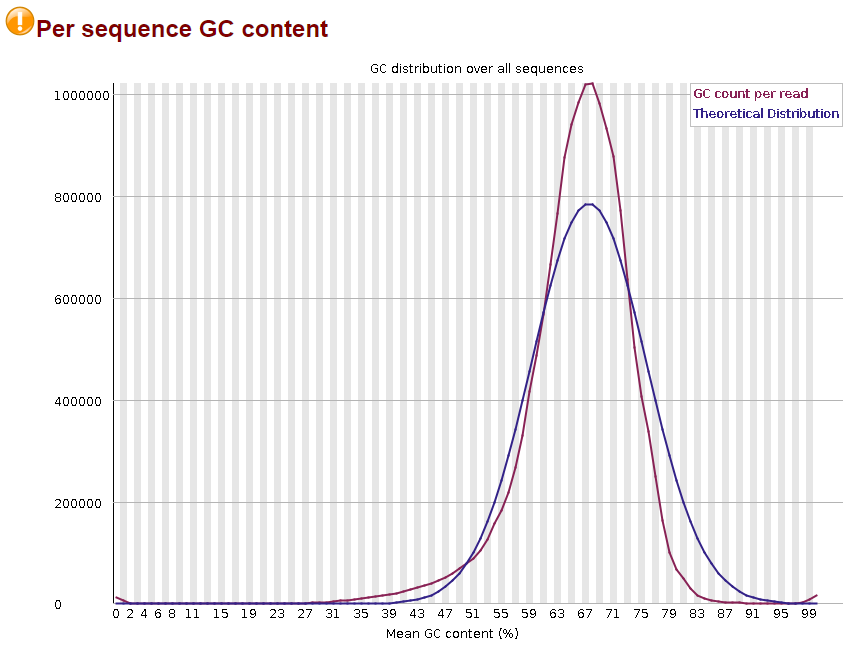

Скорей всего есть загрязнение другим организмом.

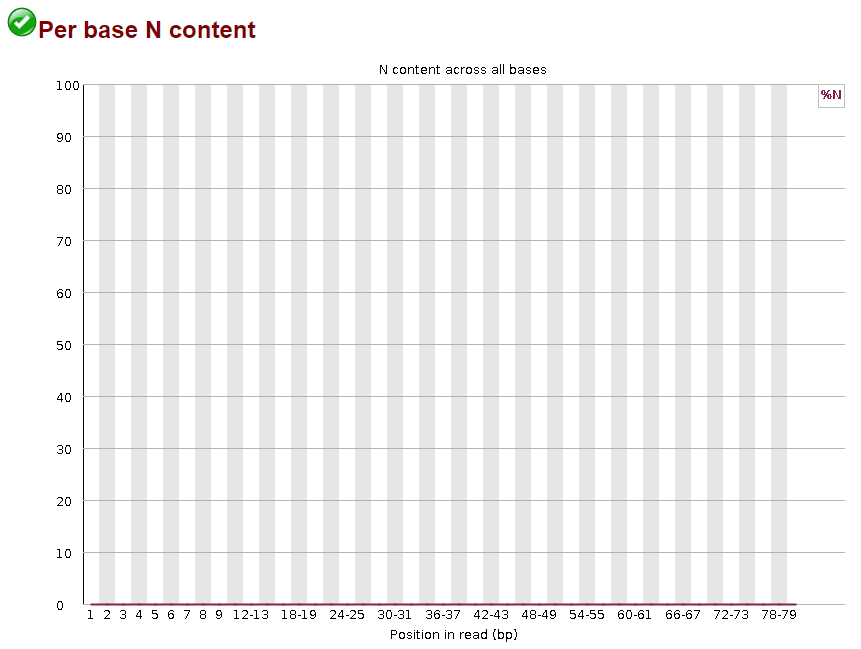

Количество непрочитанных нуклеотидов - 0.

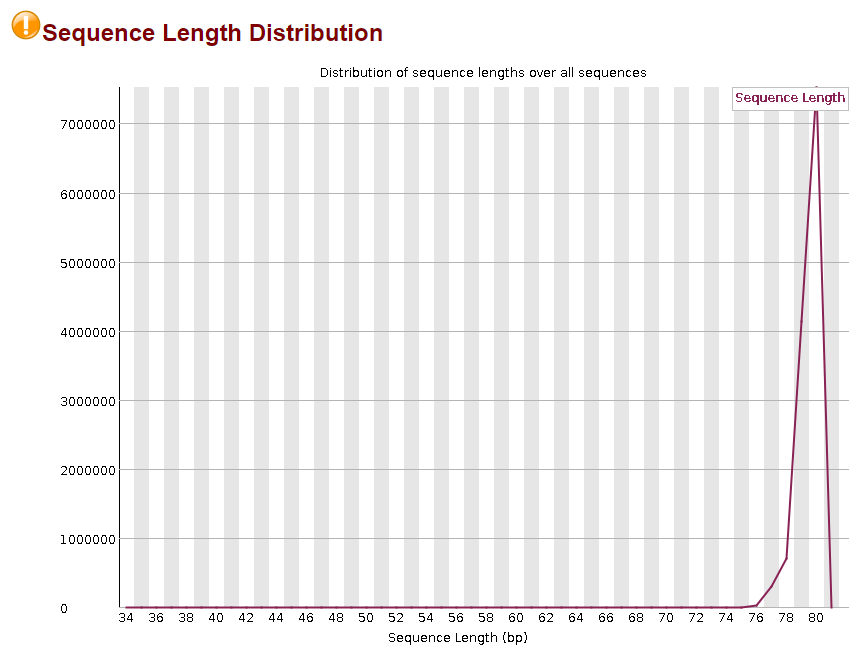

Распределение по длине ридов. От 35 до 80. Большинство - 80 нуклеотидов.

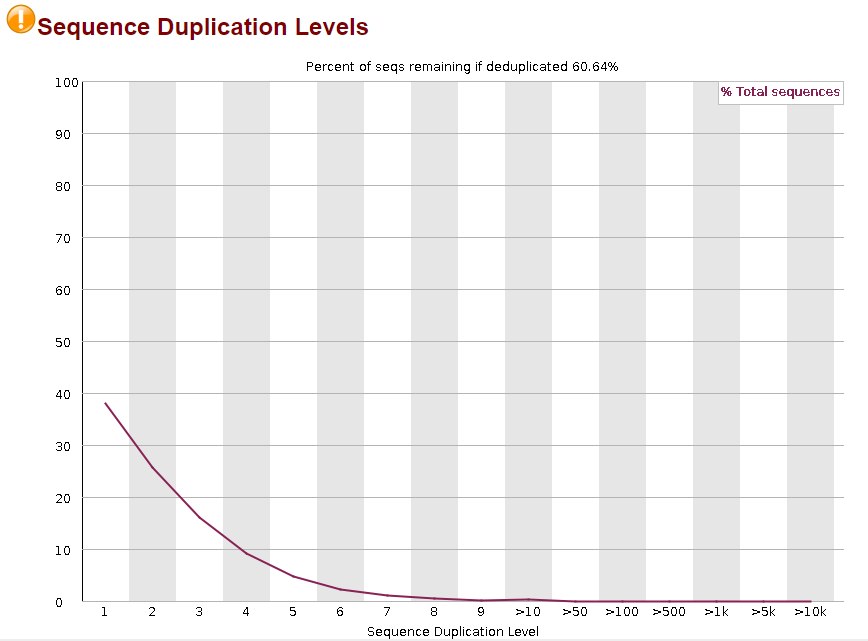

Уровень дублирования последовательностей.

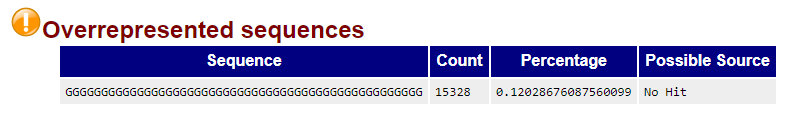

Последовательности нуклеотидов посторонних организмов.

Техническая ошибка. Такой последовательности не существует.

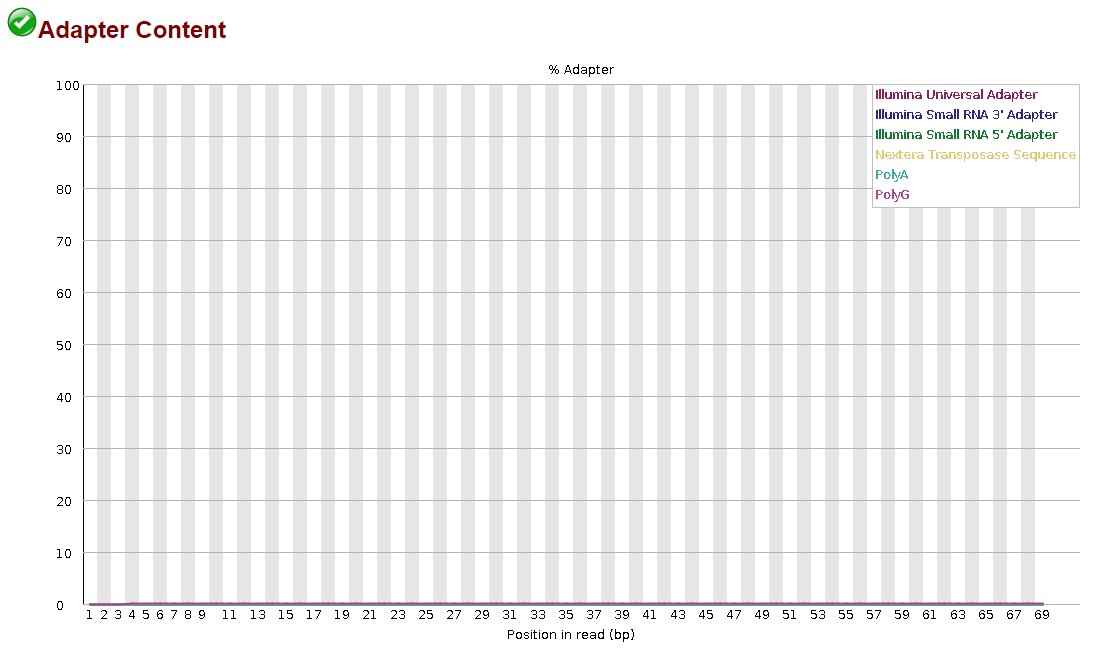

Наличие адапторных последовательностей. Если обнаружено значительное количество адапторных последовательностей, рекомендуется выполнить их обрезку.

## **Build** **reference** **index** **and perform mapping**

Собираем геном. Индексирование файлов генома.

In [ ]:
!bwa index $ref # файлы: sa, bwt, ann, amb, pac

[bwa_index] Pack FASTA... 0.05 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.84 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 0.74 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/drive/MyDrive/BIO/GCF_000006765.1_ASM676v1_genomic.fna
[main] Real time: 8.558 sec; CPU: 2.699 sec


Выравнивание.

In [ ]:
!bwa mem $ref $reads | samtools view -bS | samtools sort -o genomic.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 125902 sequences (10000014 bp)...
[M::process] read 125892 sequences (10000137 bp)...
[M::mem_process_seqs] Processed 125902 reads in 5.867 CPU sec, 5.947 real sec
[M::process] read 125900 sequences (10000049 bp)...
[M::mem_process_seqs] Processed 125892 reads in 5.485 CPU sec, 5.369 real sec
[M::process] read 125888 sequences (10000036 bp)...
[M::mem_process_seqs] Processed 125900 reads in 6.382 CPU sec, 6.333 real sec
[M::process] read 125854 sequences (10000051 bp)...
[M::mem_process_seqs] Processed 125888 reads in 5.407 CPU sec, 5.304 real sec
[M::process] read 125852 sequences (10000076 bp)...
[M::mem_process_seqs] Processed 125854 reads in 6.438 CPU sec, 6.432 real sec
[M::process] read 125874 sequences (10000105 bp)...
[M::mem_process_seqs] Processed 125852 reads in 5.489 CPU sec, 5.389 real sec
[M::process] read 125856 sequences (10000107 bp)...
[M::mem_process_seqs] Processed 125874 reads in 6.269 CPU sec, 6.250 

In [ ]:
!samtools index genomic.bam

In [ ]:
!samtools stats genomic.bam | head -n 50

# This file was produced by samtools stats (1.19.2+htslib-1.19.1) and can be plotted using plot-bamstats
# This file contains statistics for all reads.
# The command line was:  stats genomic.bam
# CHK, Checksum	[2]Read Names	[3]Sequences	[4]Qualities
# CHK, CRC32 of reads which passed filtering followed by addition (32bit overflow)
CHK	dafab61d	350ce213	2c1d26f9
# Summary Numbers. Use `grep ^SN | cut -f 2-` to extract this part.
SN	raw total sequences:	12742882	# excluding supplementary and secondary reads
SN	filtered sequences:	0
SN	sequences:	12742882
SN	is sorted:	1
SN	1st fragments:	12742882
SN	last fragments:	0
SN	reads mapped:	11260482
SN	reads mapped and paired:	0	# paired-end technology bit set + both mates mapped
SN	reads unmapped:	1482400
SN	reads properly paired:	0	# proper-pair bit set
SN	reads paired:	0	# paired-end technology bit set
SN	reads duplicated:	0	# PCR or optical duplicate bit set
SN	reads MQ0:	141951	# mapped and MQ=0
SN	reads QC failed:	0
SN	non-primary alignm

reads mapped:	11260482

sequences:	12742882

11260482/12742882 * 100 = 88

average quality:	29.8

##**STAR genome generating and mapping (RNAseq only!)**

In [ ]:
!STAR --runMode genomeGenerate --genomeDir /content --genomeFastaFiles $ref

	/usr/local/bin/STAR-avx2 --runMode genomeGenerate --genomeDir /content --genomeFastaFiles /content/drive/MyDrive/BIO/GCF_000006765.1_ASM676v1_genomic.fna
	STAR version: 2.7.11b   compiled: 2024-01-29T15:15:38+0000 :/opt/conda/conda-bld/star_1706541070242/work/source
Feb 09 21:45:50 ..... started STAR run
Feb 09 21:45:50 ... starting to generate Genome files
!!!!! WARNING: --genomeSAindexNbases 14 is too large for the genome size=6264404, which may cause seg-fault at the mapping step. Re-run genome generation with recommended --genomeSAindexNbases 10
Feb 09 21:45:50 ... starting to sort Suffix Array. This may take a long time...
Feb 09 21:45:50 ... sorting Suffix Array chunks and saving them to disk...
Feb 09 21:45:54 ... loading chunks from disk, packing SA...
Feb 09 21:45:54 ... finished generating suffix array
Feb 09 21:45:54 ... generating Suffix Array index
Feb 09 21:46:00 ... completed Suffix Array index
Feb 09 21:46:00 ... writing Genome to disk ...
Feb 09 21:46:00 ... writing S

In [ ]:
!STAR --runMode alignReads --genomeDir /content --quantMode GeneCounts \
	--outFileNamePrefix "star" --sjdbGTFfile $ann \
	--readFilesIn $reads

	/usr/local/bin/STAR-avx2 --runMode alignReads --genomeDir /content --quantMode GeneCounts --outFileNamePrefix star --sjdbGTFfile /content/drive/MyDrive/BIO/genomic1.gtf --readFilesIn /content/drive/MyDrive/BIO/SRR12905311.fastq
	STAR version: 2.7.11b   compiled: 2024-01-29T15:15:38+0000 :/opt/conda/conda-bld/star_1706541070242/work/source
Feb 09 21:46:10 ..... started STAR run
Feb 09 21:46:10 ..... loading genome
Feb 09 21:46:11 ..... processing annotations GTF
Feb 09 21:46:13 ..... started mapping
Feb 09 22:31:23 ..... finished mapping
Feb 09 22:31:24 ..... finished successfully


##**SNP calling (genomic only!)**

In [ ]:
#bam = '/content/drive/MyDrive/BIO/genomic.bam'

In [ ]:
#!bcftools mpileup -f $ref $bam | bcftools call -mv -o calls.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!bcftools mpileup -f $ref genomic.bam | bcftools call -mv -o calls.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!samtools stats genomic.bam > genomic.stats

Не удалось обработать файлы genomic.bam и calls.vsf в коде.

Файлы genomic.bam и calls.vsf были получены на онлайн платформе Galaxy (https://usegalaxy.org/).

Инструкция по обработке файлов (https://www.youtube.com/watch?v=BqYvc83655Q)

**Просмотр** **vsf** **файла** **в** **Galaxy**

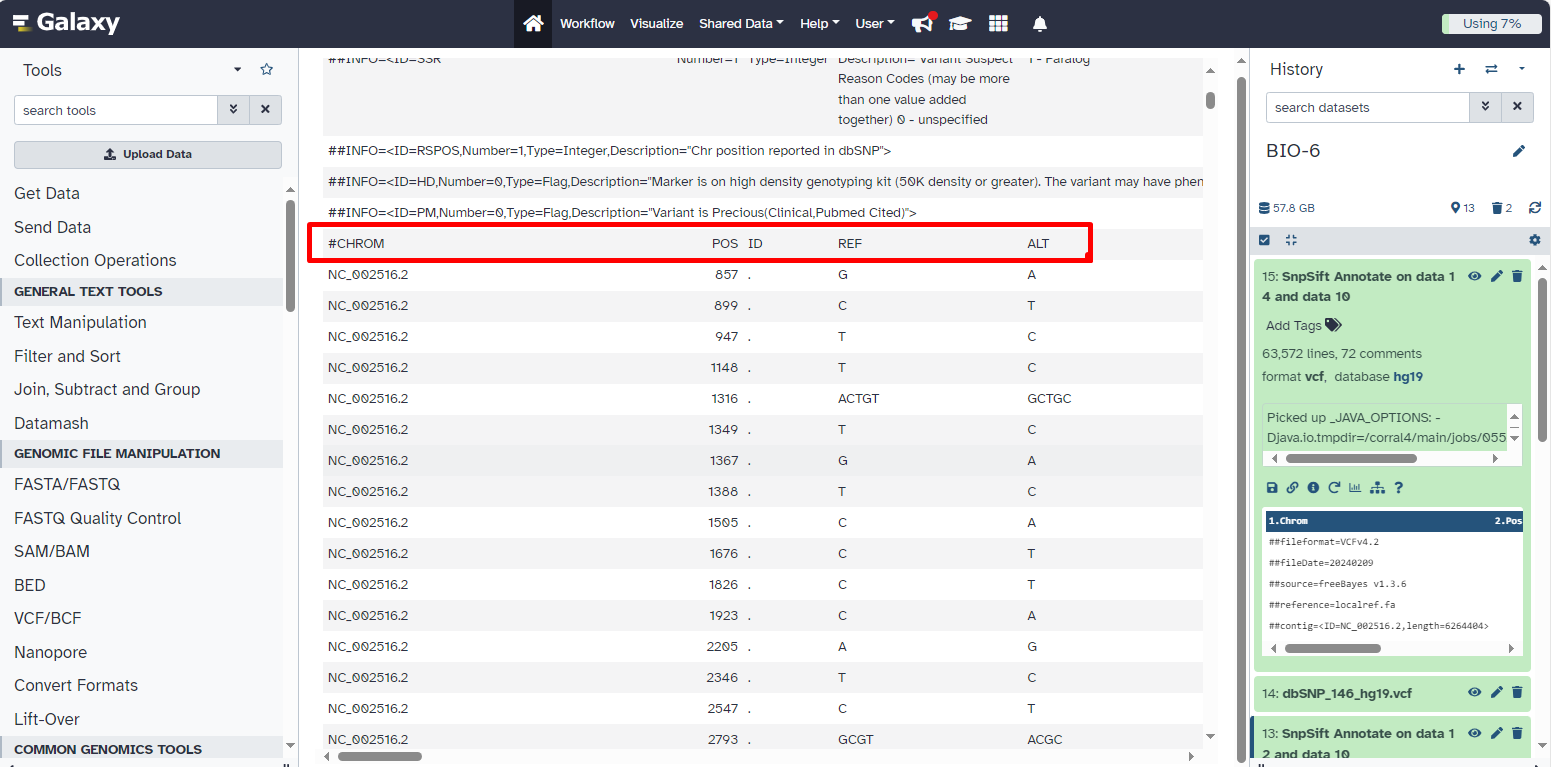

Хромосома NC_002516.2

POS - Позиции нуклеотидов

REF - нуклеотид, который должен быть

ALT - нуклеотид заменяющий

Рассмотрим в геномном браузере NCBI замены нуклеотидов в хромосоме NC_002516.2. Определим гены, в которых произошли замены.

##**Позиция 857**

Замена G на A.

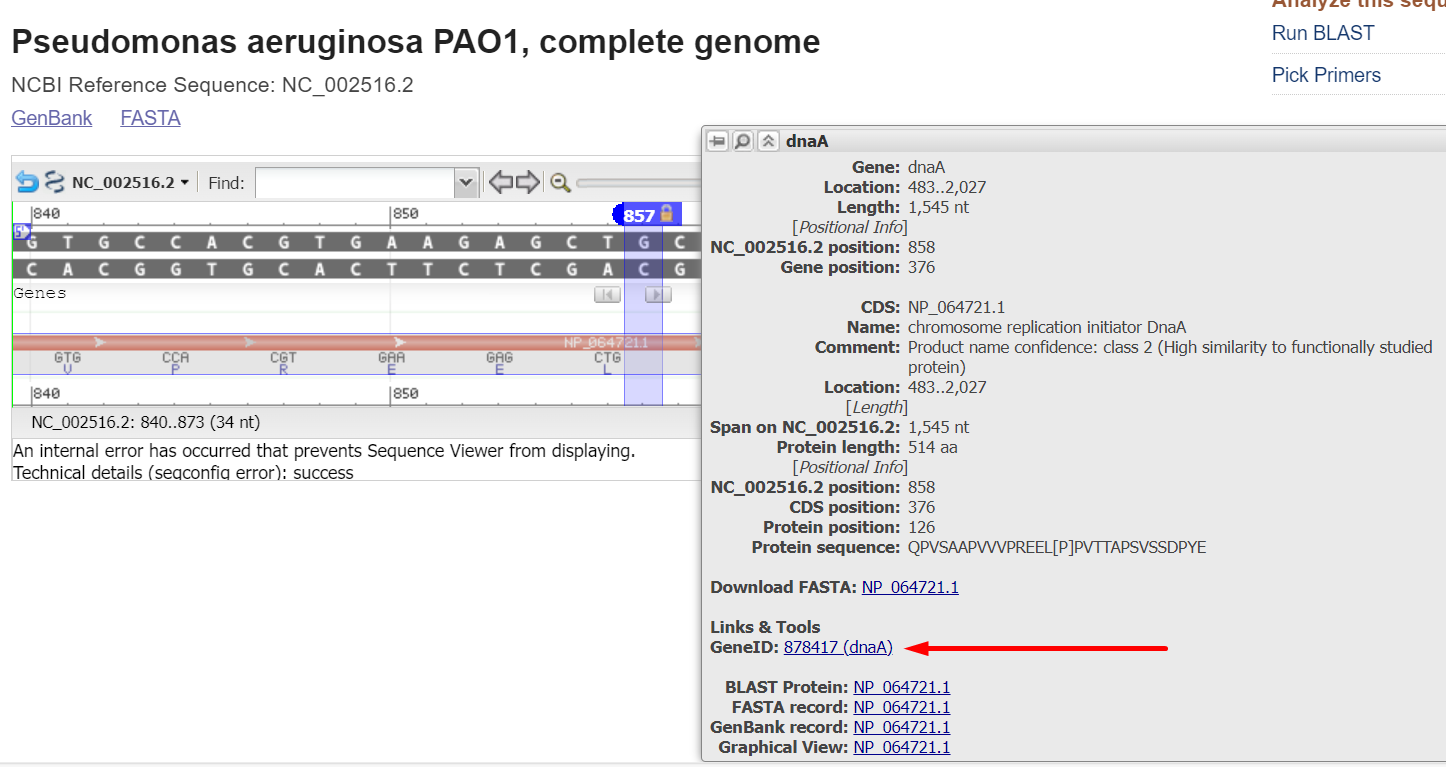

**Ген dnaA 878417**

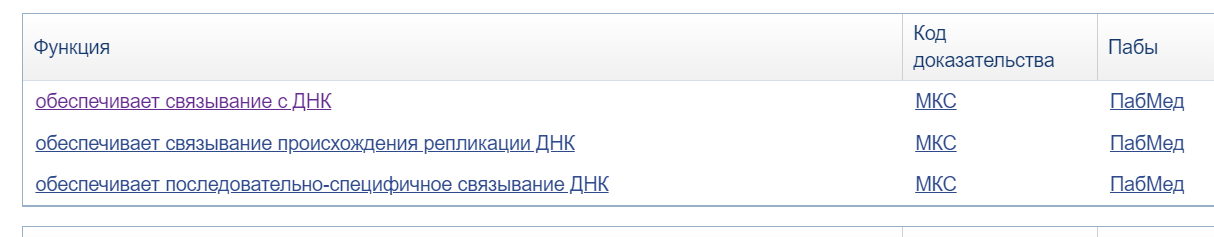

**Белок** **NP_064721**.1

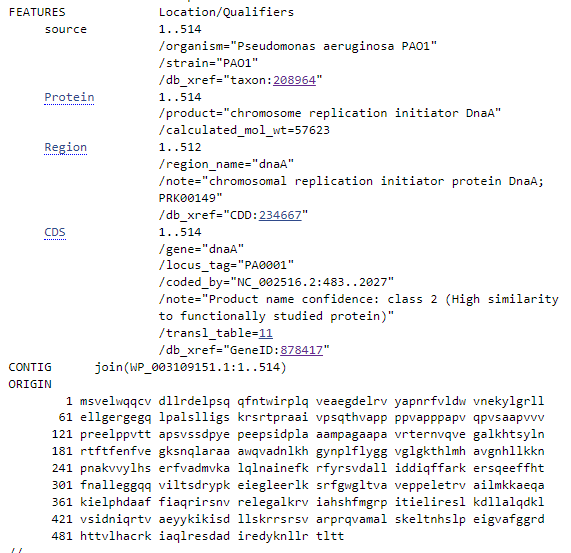

Мутация в гене dnaA 878417 приводит к нарушению репликации хромосомы.

##**Позиция 1152836**

Замена С на G.

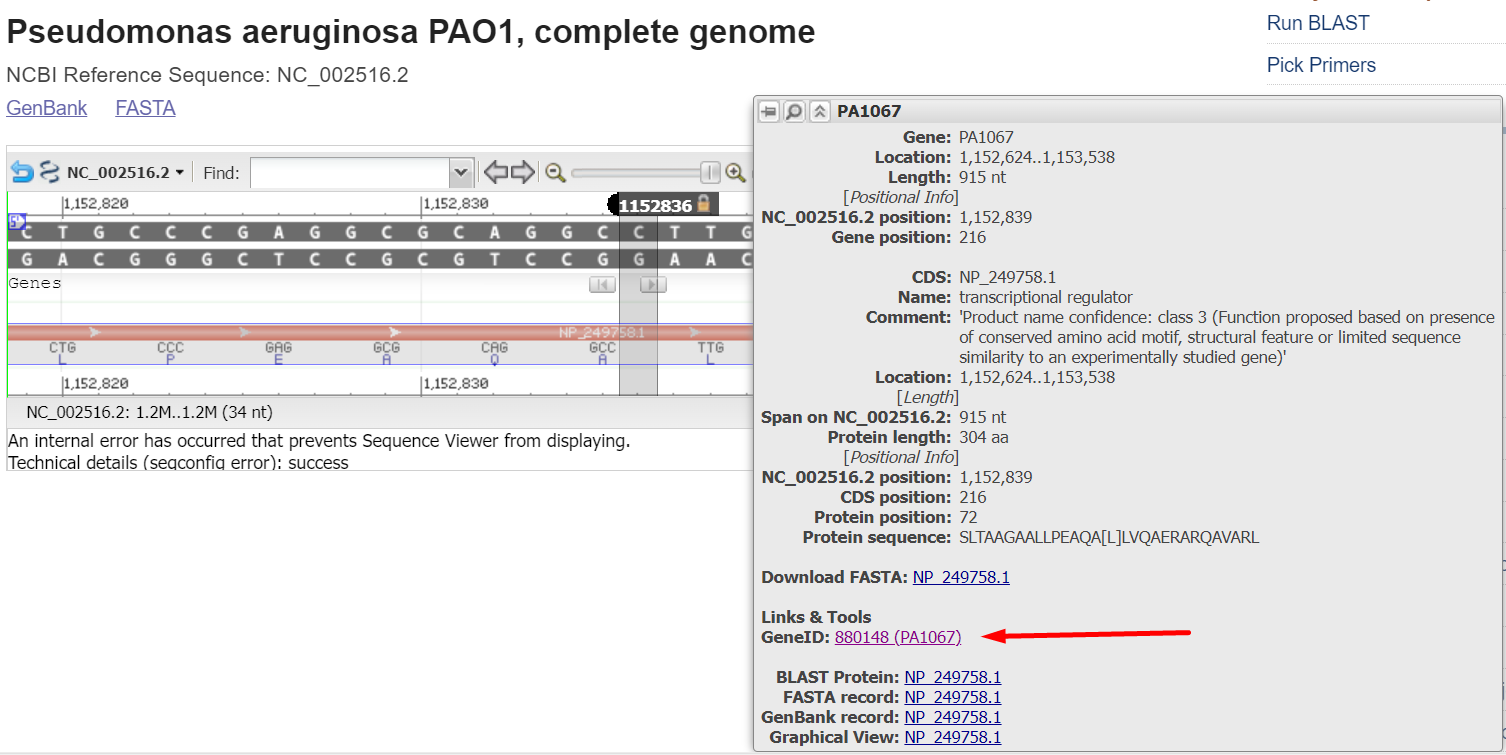

**Ген PA1067 (880148)**

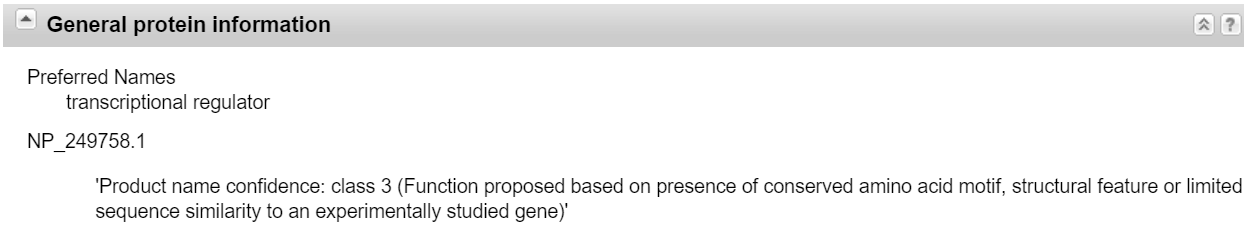

**Белок NP_249758.1**

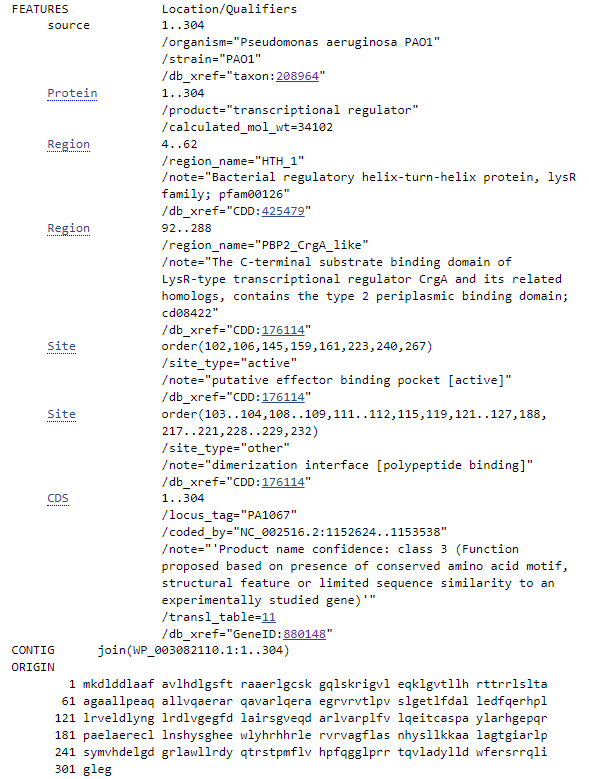

Мутация в гене PA1067 (880148) приводит к нарушению транскрипции ДНК.

##**Позиция 1490911**

Замена CGGGC на TGGAT

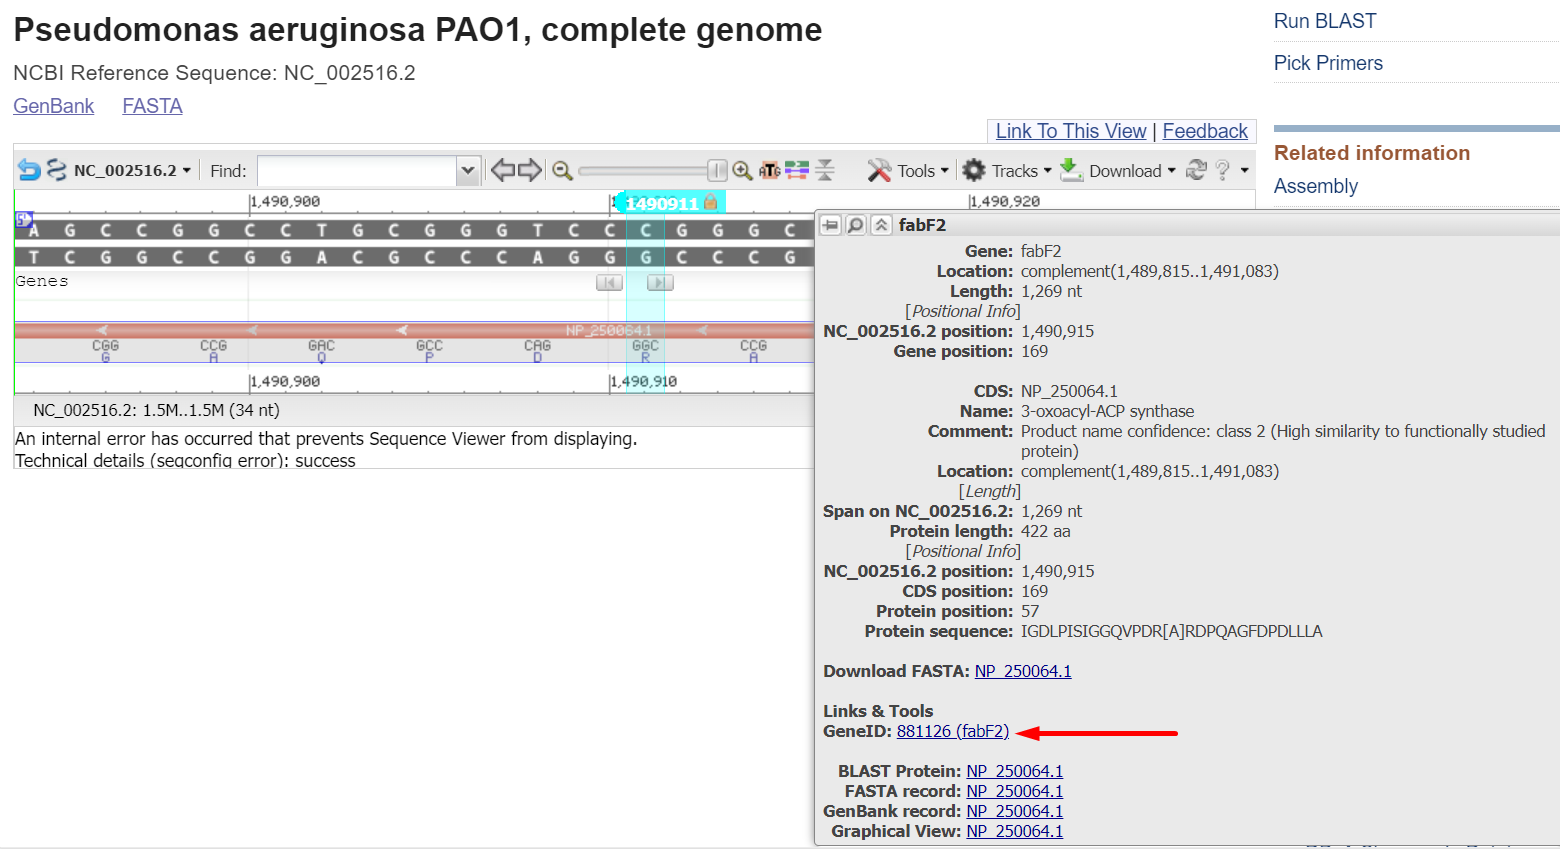

Ген fabF2 (881126)

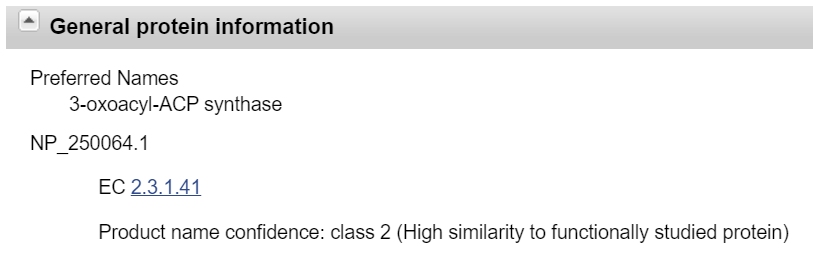

**Белок NP_250064.1**

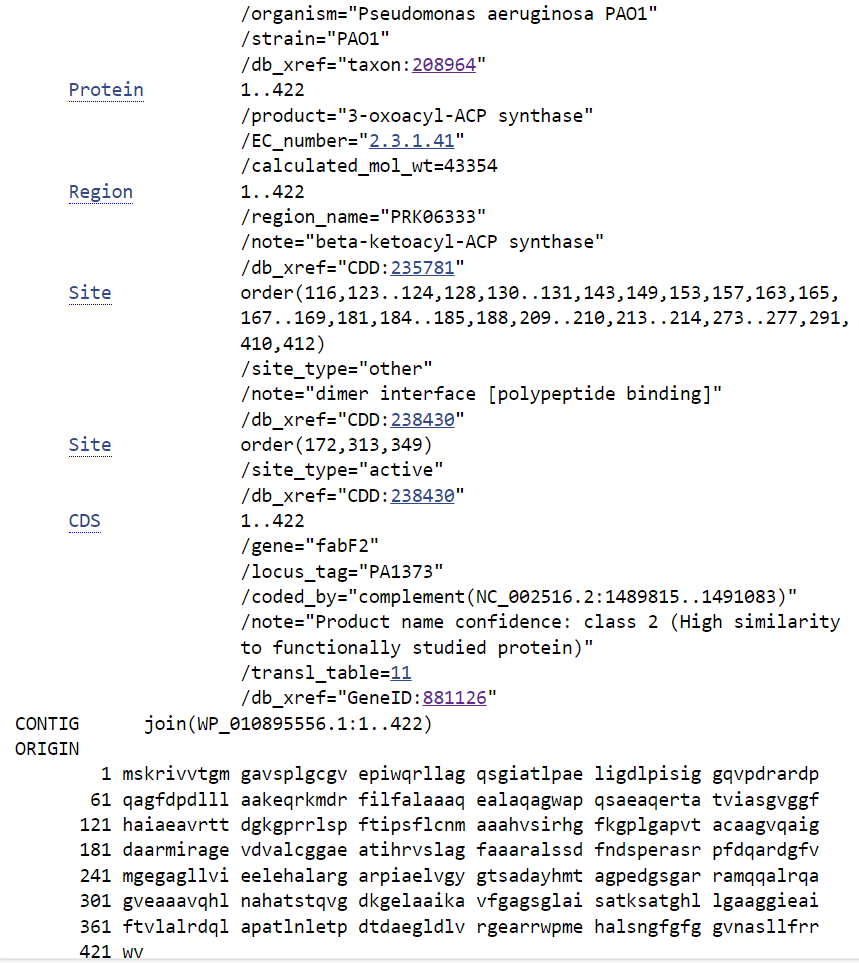

Мутация в гене  fabF2 (881126) приводит к нарушению синтеза фермента 3-оксоакцил-[АПБ]-синтаза.